In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

In [2]:
from network_matrix.population  import Population

In [3]:
def graph_progress(all_costs, all_accuracies):
    # last 5 results
    # ---------------
    line1 = "cost: "
    line2 = "acc:  "
    for i in range(-5, 0):
        line1 += "{:>6} ".format(round(all_costs[i], 2))
        line2 += "{:>6}%".format(round(all_accuracies[i]*100, 2))
    print(line1)
    print(line2)


    # graphs
    # -------
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    axes[0].plot(range(len(all_costs)), all_costs, label="costs")
    axes[0].set_xlabel('step') # Set the y axis label of the current axis.
    axes[0].set_ylabel('cost') # Set a title of the current axes.
    axes[0].set_title('cost over training steps') 
    axes[0].legend() # show a legend on the plot

    axes[1].plot(range(len(all_accuracies)), all_accuracies, label="accuracies")
    axes[1].set_xlabel('step') # Set the y axis label of the current axis.
    axes[1].set_ylabel('accuracy') # Set a title of the current axes.
    axes[1].set_title('accuracy over training steps') 
    axes[1].legend() # show a legend on the plot

    return fig.tight_layout()

# set up logic data

In [4]:
inputs    = np.array([[-1,-1], [-1,1], [1,-1], [1,1]])
solutions = np.array([   [-1],   [ 1],   [ 1],  [-1]])
variance  = np.array([1])

np_data = [inputs, solutions, variance, inputs, solutions, variance]

In [16]:
TEST_population  = Population(2, 1, learning_rate=0.01)

all_times = [0,0,0,0,0]
all_costs = []
all_accuracies = []

In [28]:
# training loops
# ---------------
times, costs, accuracies = TEST_population.train_and_test(np_data, 1000)
#times, costs, accuracies = TEST_population.train_and_test_stochastic(np_data, 40, 400)

# update tracking
# ---------------
for i in range(len(all_times)):
    all_times[i] += times[i]
all_costs      += costs
all_accuracies += accuracies

[######                                            ] -   12.3% | 123/1000 steps | time: 0.2s | remaining: 1.4s |   

[###########                                       ] -   22.9% | 229/1000 steps | time: 0.4s | remaining: 1.2s |   

[###############                                   ] -   30.5% | 305/1000 steps | time: 0.5s | remaining: 1.2s |   

 
             time(s)   percent  per step       | steps:             2000
            --------  --------  --------       | learning rate:     0.01
calc value      1.74     41.14%      0.0       | # connections:       10
grad dscnt      2.19     51.86%      0.0       | L1 (sum):        0.4987
scoring         0.15      3.64%      0.0       | L2 (**2):        1.4229
step time       4.23     100.0%      0.0

cost:   0.04   0.04   0.04   0.04   0.04 
acc:     0.0%   0.0%   0.0%   0.0%   0.0%


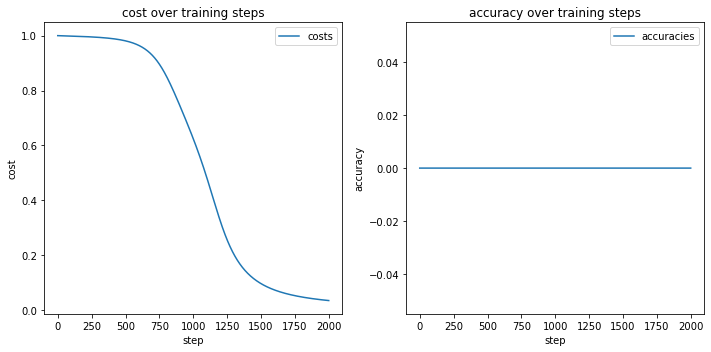

In [22]:
TEST_population.report_training_progress(all_times) # timing
graph_progress(all_costs, all_accuracies)           # graphs

In [27]:
TEST_population.layers[0]["values"] = np_data[0][0]
TEST_population.calculate_values()

array([-0.82927704], dtype=float32)

In [24]:
for i in range(1, len(TEST_population.layers)):
    print("values ", TEST_population.layers[i]["values"])
    print("weights", TEST_population.layers[i]["weights"])
    print("biases ", TEST_population.layers[i]["biases"])
    print("w_cost ", TEST_population.layers[i]["w_cost"])
    print("b_cost ", TEST_population.layers[i]["b_cost"])
    print("v_cost ", TEST_population.layers[i]["v_cost"])
    print()

values  [-0.87148714 -0.9640683 ]
weights [[-0.795732    0.89524225]
 [-0.86675066  0.78338422]]
biases  [ 0.35174446 -0.35044157]
w_cost  [[-0.00801423 -0.00801423]
 [ 0.02929452  0.02929452]]
b_cost  [-0.00801423  0.02929452]
v_cost  [-0.01901334  0.015771  ]

values  [-0.99385446 -0.896011  ]
weights [[0.85591888 1.37949361]
 [1.62658001 1.0603654 ]]
biases  [-0.81520217  0.98819714]
w_cost  [[ 0.02127455 -0.02054482]
 [-0.01391969  0.01344224]]
b_cost  [ 0.05029874 -0.03290987]
v_cost  [-0.01047756  0.03447824]

values  [0.78945076]
weights [[ 1.60885613 -1.56043131]]
biases  [1.27077749]
w_cost  [[-0.05804322  0.06392463]]
b_cost  [0.07553572]
v_cost  [ 0.12150348 -0.11784446]



In [12]:
#TEST_population.calc_grad_descent(np_data[1][0], np_data[2])

In [14]:
print("     weights, biases, values, v_cost, w_cost, w_cost_sum, b_cost, b_cost_sum")

for i in range(len(TEST_population.layers)):
    line = "{} - ".format(i)
    for key in TEST_population.layers[i].keys():
        #print(key)
        line += "{:>6} ".format(TEST_population.layers[i][key].size)
    print(line)

     weights, biases, values, v_cost, w_cost, w_cost_sum, b_cost, b_cost_sum
0 -      2 
1 -      4      2      2      2      4      4      2      2 
2 -      4      2      2      2      4      4      2      2 
3 -      2      1      1      2      2      2      1      1 
